## Data Import 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import tools as tool
from tools import utils as util

In [31]:
data = pd.read_csv('data/House_Price.csv')

In [32]:
#selecting all columns that do not have numeric values
object_column = data.select_dtypes(include = ['object']).columns.tolist()

## Feature Processing (One Hot and Label Encoding)

In [33]:
data = pd.read_csv('data/House_Price.csv')

In [34]:
#selecting which columns to use label encoding on
#columns that compare the quality should be used or show that one category is better than
#another category should be used here
lccolumn = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

In [35]:
#selecting which columns to use one hot encoding on
#ex: Streets should use the one hot encoder because the type of road 
#access should be based on whether it exists or not. 
ohccolumn = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
             'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation','Heating','Electrical','GarageType','MiscFeature','SaleType','SaleCondition']

In [36]:
for column in ohccolumn:
    data = util.one_hot_encoding(data, column)

In [37]:
for column in lccolumn:
    data = util.label_encoder(data, column)

In [38]:
combined_data = data

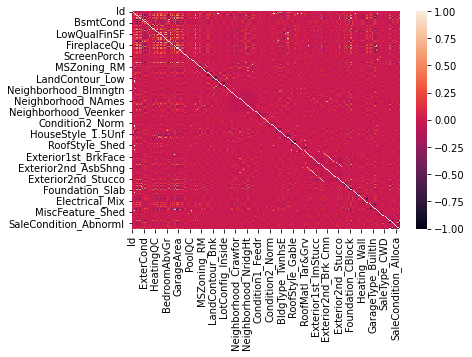

In [39]:
sns_plot = sns.heatmap(combined_data.corr())
fig = sns_plot.get_figure()
fig.savefig("figures/combined_data_heatmap")

In [40]:
threshold = 0.7

df_corr = combined_data.corr()

columns = np.full((df_corr.shape[0],), True, dtype=bool)

for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False


selected_columns = combined_data.columns[~columns]
high_correlation = combined_data[selected_columns]

In [41]:
absolute_corr = np.abs(df_corr["SalePrice"])
df_corr["SalePrice"][absolute_corr > 0.5]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
ExterQual      -0.636884
BsmtQual       -0.620886
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
KitchenQual    -0.589189
TotRmsAbvGrd    0.533723
GarageFinish   -0.549247
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [42]:
selected_columns

Index(['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice',
       'Neighborhood_Somerst', 'HouseStyle_2Story', 'RoofStyle_Shed',
       'RoofMatl_Tar&Grv', 'Exterior2nd_AsbShng', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'MiscFeature_Gar2', 'SaleCondition_Partial'],
      dtype='object')

In [43]:
high_correlation.corr().head()

,1stFlrSF,TotRmsAbvGrd,GarageYrBlt,GarageArea,SalePrice,Neighborhood_Somerst,HouseStyle_2Story,RoofStyle_Shed,RoofMatl_Tar&Grv,Exterior2nd_AsbShng,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MiscFeature_Gar2,SaleCondition_Partial
1stFlrSF,1.000000,0.409516,0.233449,0.489782,0.605852,-0.018495,-0.269813,0.017622,0.071021,-0.063332,-0.021856,0.080482,-0.039553,-0.144566,0.110230,0.014831,0.071504,-0.057258,-0.000300,0.221037
TotRmsAbvGrd,0.409516,1.000000,0.148112,0.337822,0.533723,-0.015275,0.430930,0.033786,-0.013142,0.002335,-0.008343,0.048695,-0.035270,-0.113001,-0.029205,0.049522,0.127698,-0.046896,0.045183,0.142032
GarageYrBlt,0.233449,0.148112,1.000000,0.564567,0.486362,0.277452,0.186831,-0.000782,-0.050926,-0.136388,-0.012559,0.113738,-0.047607,-0.198319,-0.055669,-0.136639,0.533014,-0.325996,-0.015451,0.349327
GarageArea,0.489782,0.337822,0.564567,1.000000,0.623431,0.184533,0.137946,0.020798,-0.006663,-0.092541,-0.016534,0.046189,-0.033155,-0.115115,-0.002738,0.001273,0.280274,-0.176492,-0.003896,0.294714
SalePrice,0.605852,0.533723,0.486362,0.623431,1.000000,0.140058,0.242880,0.020557,0.004921,-0.099220,-0.025028,0.128183,-0.067864,-0.162389,-0.052941,-0.042416,0.306389,-0.161800,-0.004744,0.352060


## Log Sale Price

/srv/conda/envs/housetools/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


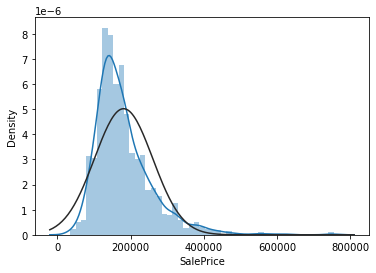

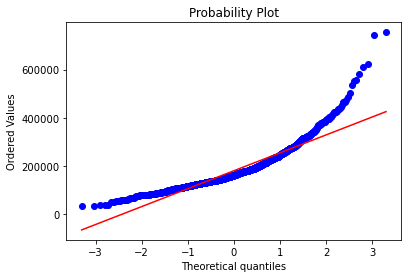

In [44]:
util.dist_and_prob_plot(data, 'SalePrice')

/srv/conda/envs/housetools/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


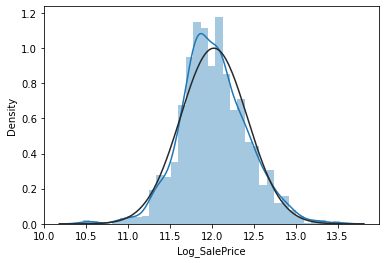

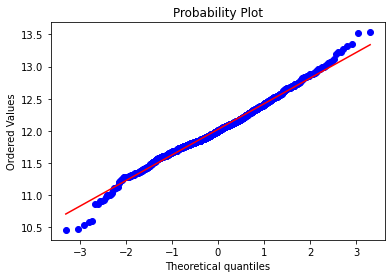

In [45]:
data['Log_SalePrice'] = np.log(data['SalePrice'])
util.dist_and_prob_plot(data, 'Log_SalePrice')

In [50]:
combined_data['SalePrice'] = np.log(combined_data['SalePrice'])
combined_data = combined_data.drop('Log_SalePrice', axis = 1)

## Random Forest Model(One Hot and Label Encoding)

In [51]:
combined_data = combined_data.dropna()
X = combined_data.drop(['SalePrice', 'Id'], axis = 'columns')
y = combined_data['SalePrice']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [53]:
#made a dataframe with values greater than .001 importance
#sorted the values to look better on bargraph
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
a = dataframe[dataframe[0] > .001]
a = a.rename(columns = {0: 'values'})
b = a.sort_values('values', ascending = True)
b.head()

,values
SaleCondition_Normal,0.001003
Neighborhood_Crawfor,0.001102
PavedDrive,0.001204
BsmtFullBath,0.001268
BedroomAbvGr,0.001279


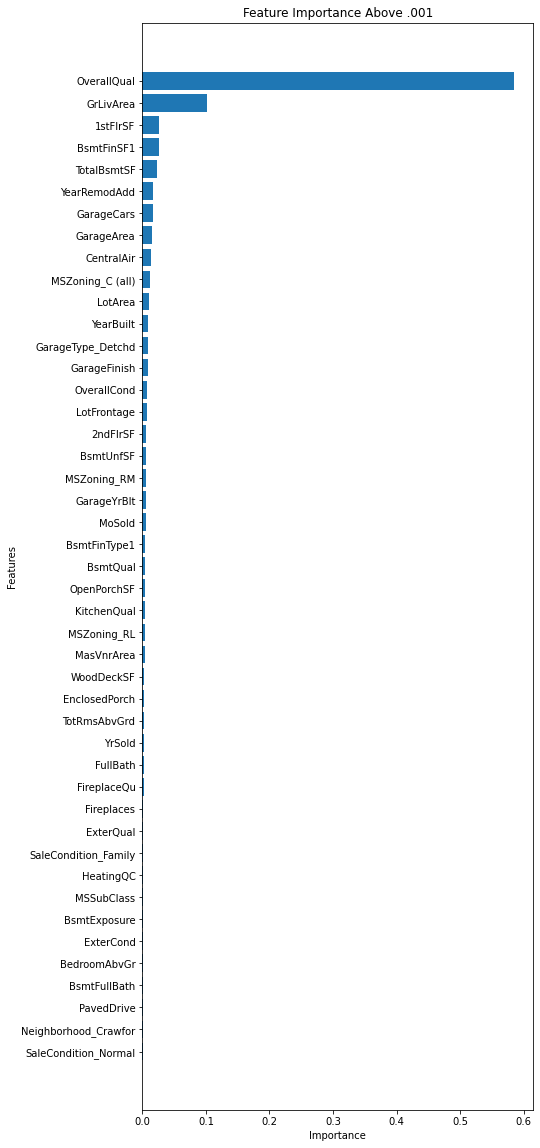

In [55]:
plt.figure(figsize=(7, 20))
plt.barh(b.index, b['values'])
plt.title('Feature Importance Above .001')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.savefig('figures/Top 45 Combined Encoding Feature Importance)')

In [57]:
#made another dataframe with a smaller importance threshold
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
c = dataframe[dataframe[0] > .01]
c = c.rename(columns = {0: 'values'})
d = c.sort_values('values', ascending = True)
d

,values
LotArea,0.010863
MSZoning_C (all),0.012626
CentralAir,0.012892
GarageArea,0.014802
GarageCars,0.016437
YearRemodAdd,0.017238
TotalBsmtSF,0.023537
BsmtFinSF1,0.026254
1stFlrSF,0.026789
GrLivArea,0.101528


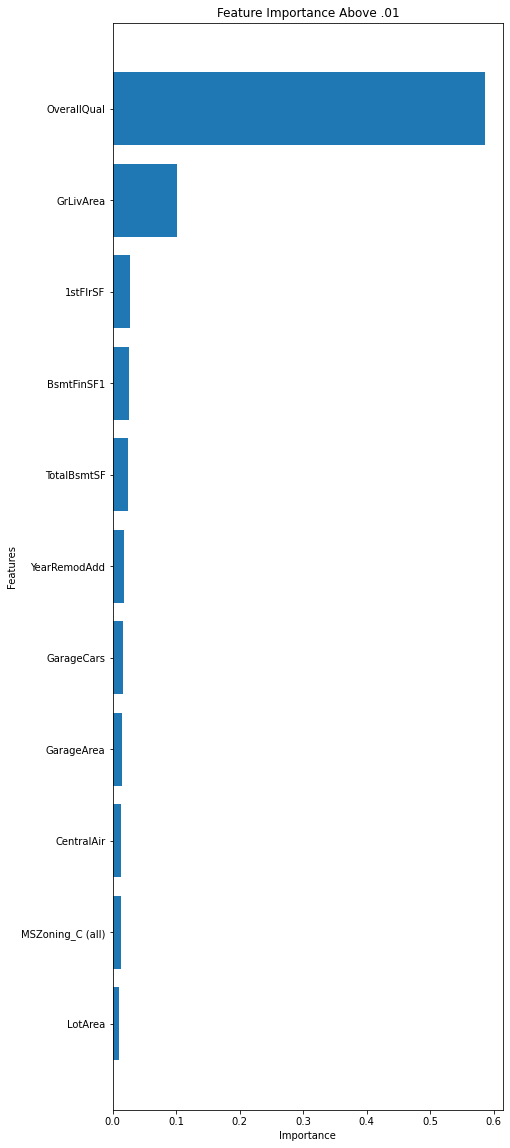

In [58]:
plt.figure(figsize=(7, 20))
plt.barh(d.index, d['values'])
plt.title('Feature Importance Above .01')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.savefig('figures/Top 11 Combined Encoding Feature Importance)')

In [80]:
y_output = rf.predict(X_test)

In [91]:
print('MSE', mean_squared_error(y_test, y_output))
print('RMSE', (mean_squared_error(y_test, y_output))** (1/2))
print('Adj R^2 value:', r2_score(y_test, y_output))

MSE 0.00015989179376242943
RMSE 0.012644832690171484
Adj R^2 value: 0.8642769485910046


In [98]:
pd.DataFrame({'Type of Error':['MSE', 'RMSE', 'Adj R^2 Value'],'Value' : [mean_squared_error(y_test, y_output), (mean_squared_error(y_test, y_output))** (1/2),  r2_score(y_test, y_output)]}).set_index('Type of Error').to_csv('data/Combined_Error_Table.csv')